# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys_1 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [30]:
cities

['kochubey',
 'apac',
 'smithers',
 'rikitea',
 'egvekinot',
 'saleaula',
 'praia da vitoria',
 'busselton',
 'ponta do sol',
 'kathu',
 'samusu',
 'buala',
 'grand river south east',
 'aklavik',
 'port alfred',
 'yar-sale',
 'khani',
 'kavieng',
 'kazalinsk',
 'barrow',
 'nanticoke',
 'bluff',
 'cabo san lucas',
 'ushuaia',
 'bucerias',
 'vao',
 'safwah',
 'tongzi',
 'belushya guba',
 'mataura',
 'broken hill',
 'albany',
 'ninotsminda',
 'baillif',
 'bahia honda',
 'falan',
 'les cayes',
 'kodiak',
 'ondo',
 'northport',
 'dukhovshchina',
 'mar del plata',
 'martin',
 'saint george',
 'ugoofaaru',
 'saint-philippe',
 'sitka',
 'saldanha',
 'lompoc',
 'hofn',
 'illoqqortoormiut',
 'haibowan',
 'sentyabrskiy',
 'mahebourg',
 'trelew',
 'yulara',
 'hoi an',
 'nalut',
 'cuenca',
 'taolanaro',
 'dikson',
 'zhanaozen',
 'bairiki',
 'port shepstone',
 'komsomolskiy',
 'kapaa',
 'tuatapere',
 'butaritari',
 'sedalia',
 'abay',
 'phra phutthabat',
 'san jose',
 'jiuquan',
 'blairmore',
 'cari

In [186]:
original_cities = cities
cities =["London", "Boston","Cape Town", "Sydney", "Rachel City"]

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [153]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL. PUT THIS IN FOR LOOP.
query_url = url + "appid="+ weather_api_key + "&q=" + city


In [154]:
# #Looking at json print to see categories on test city, London
test_query_url = f"{url}appid={weather_api_key}&units={units}&q={testcity}"
testcity = "London"
weather_response = requests.get(test_query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=2))

{
  "coord": {
    "lon": -0.13,
    "lat": 51.51
  },
  "weather": [
    {
      "id": 804,
      "main": "Clouds",
      "description": "overcast clouds",
      "icon": "04n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 49.64,
    "feels_like": 44.89,
    "temp_min": 48.99,
    "temp_max": 51.8,
    "pressure": 1025,
    "humidity": 71
  },
  "visibility": 10000,
  "wind": {
    "speed": 4.7,
    "deg": 0
  },
  "clouds": {
    "all": 85
  },
  "dt": 1602786556,
  "sys": {
    "type": 1,
    "id": 1414,
    "country": "GB",
    "sunrise": 1602743091,
    "sunset": 1602781635
  },
  "timezone": 3600,
  "id": 2643743,
  "name": "London",
  "cod": 200
}


In [187]:
#Lists to hold response information:

cityname = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

#City and set counters initializing
counter = 0
setnumber = 1

#Loop through the city list and perform data requests
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    query_url = url + "appid="+ weather_api_key + "&q=" + city + "&units=" +"imperial"
    try:
        response=requests.get(query_url).json()
        cityname.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        #Including the counters within the for loop so the print statement updates
        if counter == 50:
            counter = 1
            setnumber += 1

        else:
            counter += 1

        
        #Printing each record for every city
        print(f"Processing Record {counter} of Set {setnumber} | {city}")
        
        time.sleep(1)
    except:
        print(f"City {city} not found. Skipping...")
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | London
Processing Record 2 of Set 1 | Boston
Processing Record 3 of Set 1 | Cape Town
Processing Record 4 of Set 1 | Sydney
City Rachel City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------


In [156]:
#Checking array length for dataframe assembly
print(len(cityname))
print(len(lat))
print(len(lng))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date))

3
3
3
3
3
3
3
3
3


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

## Convert Raw Data to DataFrame
* Save as csv

In [188]:
#Create a data frame from the following dictionary:

#Dictionary
weather_dict = {
    "City": cityname,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

#Saving as csv
weather_data.to_csv("Weather CSV")

In [189]:
weather_data.head()

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0     London  51.51   -0.13     50.00        76          91        5.82   
1     Boston  42.36  -71.06     72.00        46          40       25.28   
2  Cape Town -33.93   18.42     61.00        77          75       16.11   
3     Sydney -33.87  151.21     64.99        88          75       31.09   

  Country        Date  
0      GB  1602794019  
1      US  1602793883  
2      ZA  1602794440  
3      AU  1602794341

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   butaritari   3.07  172.79     83.32        74          84       10.42   
1  yerbogachen  61.28  108.01     79.52        58          20        7.70   
2    cape town -33.93   18.42     73.00        77          27        4.70   
3        touba   8.28   -7.68     79.97        75          82        3.58   
4    jamestown  42.10  -79.24     64.00        88           1        6.93   

  Country        Date  
0      KI  1593605283  
1      RU  1593605121  
2      ZA  1593605039  
3      CI  1593605284  
4      US  1593605284

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

(10/15/2020)


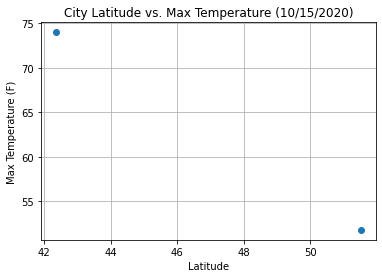

In [131]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature "+str(todaysdate))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Max Temperature.png")

# Show plot
plt.show()

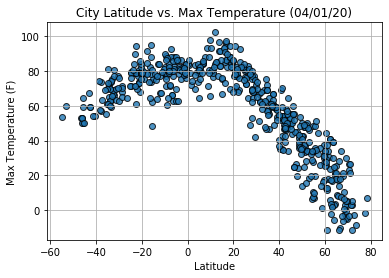

### Latitude vs. Humidity Plot

(10/15/2020)


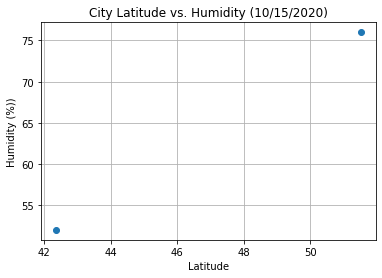

In [133]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity "+str(todaysdate))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot
plt.show()

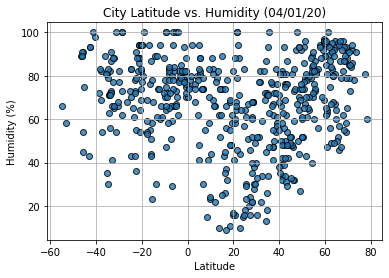

### Latitude vs. Cloudiness Plot

(10/15/2020)


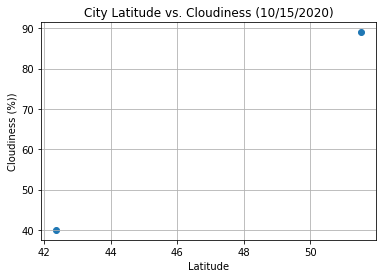

In [134]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness "+str(todaysdate))
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

(10/15/2020)


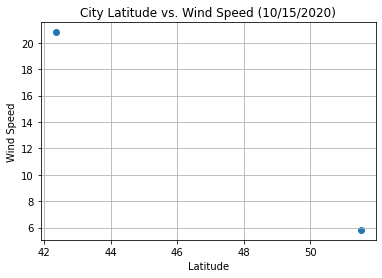

In [135]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed "+str(todaysdate))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot
plt.show()

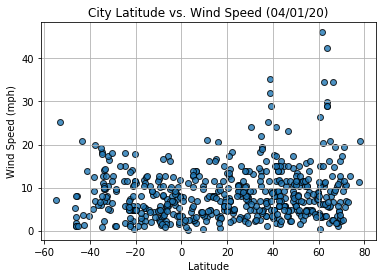

## Linear Regression

### Write linear regression plot function (optional)

In [190]:
#Creating dataframe for southern hemisphere
southerndf=weather_data.loc[weather_data["Lat"]<0]
southerndf


City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
2  Cape Town -33.93   18.42     61.00        77          75       16.11   
3     Sydney -33.87  151.21     64.99        88          75       31.09   

  Country        Date  
2      ZA  1602794440  
3      AU  1602794341

In [162]:
#Creating dataframe for northern hemisphere
northerndf=weather_data.loc[weather_data["Lat"]>=0]
northerndf



City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
0  London  51.51  -0.13     51.80        71          85         4.7      GB   
1  Boston  42.36 -71.06     73.99        43          40        20.8      US   

         Date  
0  1602786556  
1  1602786578

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

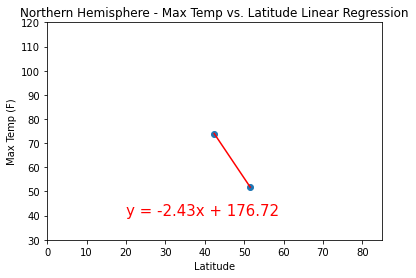

rvalue: -1.0


In [196]:
#Northern Hemisphere: max temp vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(30, 120)
plt.show()

print("rvalue: " + str(rvalue))






The r-value is: 0.46937863826630627


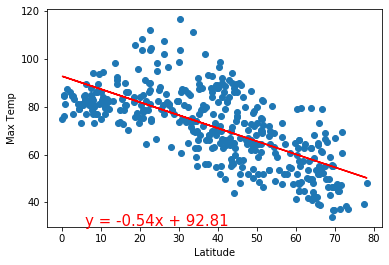

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

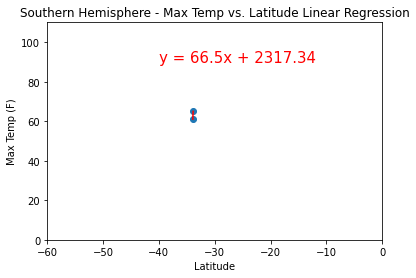

rvalue: 1.0


In [195]:
#Southern Hemisphere: max temp vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-40,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))


The r-value is: 0.6082708688906918


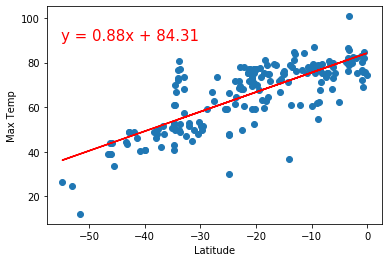

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

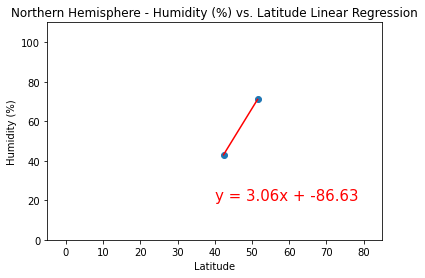

rvalue: 1.0


In [202]:
#Northern Hemisphere: humidity vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(-5, 85)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))

The r-value is: 0.000543987878808455


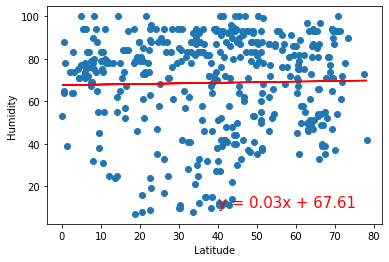

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

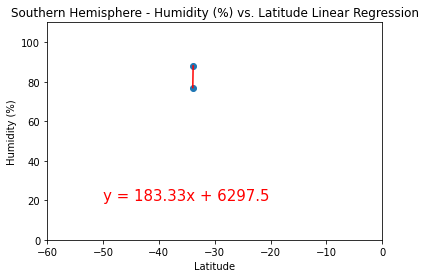

rvalue: 1.0


In [203]:
#Southern Hemisphere: humidity vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))


The r-value is: 0.014985174297345524


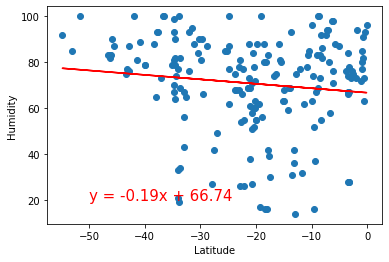

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

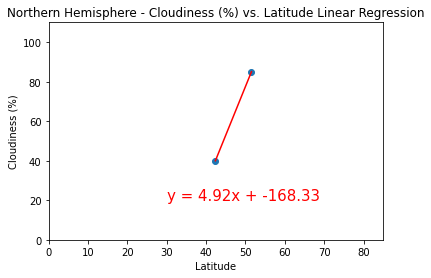

rvalue: 1.0


In [184]:
#Northern Hemisphere: cloudiness vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))


The r-value is: 0.0020898727664228514


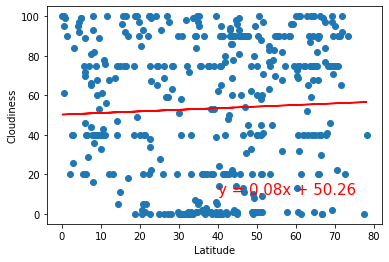

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

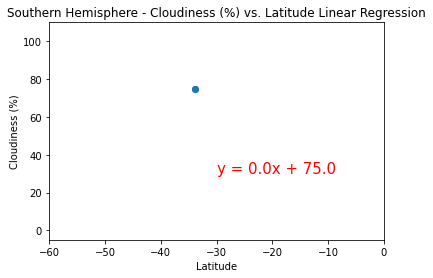

rvalue: 0.0


In [204]:
#Southern Hemisphere: cloudiness vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlim(-60,0)
plt.ylim(-5,110)
plt.show()

print("rvalue: " + str(rvalue))


The r-value is: 0.0035263772085582894


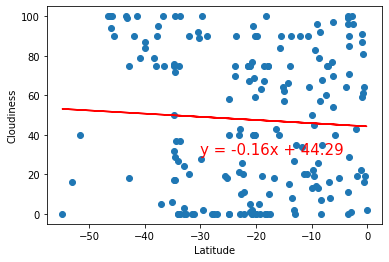

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

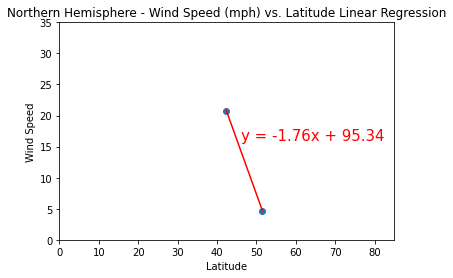

In [175]:
#Northern Hemisphere: wind speed vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(46,16),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(0, 35)
plt.show()


The r-value is: 0.04019723576144484


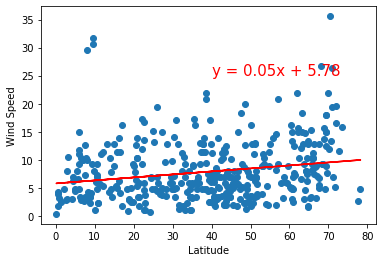

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

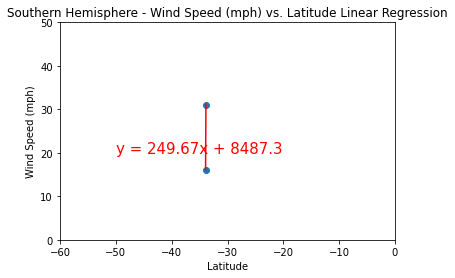

rvalue: 1.0


In [205]:
#Southern Hemisphere: wind speed vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 50)
plt.show()

print("rvalue: " + str(rvalue))


The r-value is: 0.017128274759839232


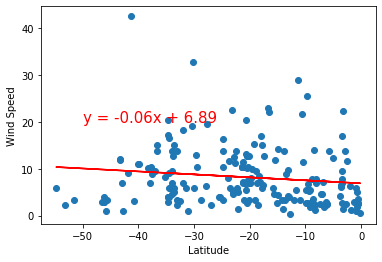